# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [8]:
hospital_read_df['Measure Name'].unique()

array(['READM-30-HIP-KNEE-HRRP', 'READM-30-HF-HRRP', 'READM-30-COPD-HRRP',
       'READM-30-PN-HRRP', 'READM-30-AMI-HRRP'], dtype=object)

In [47]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

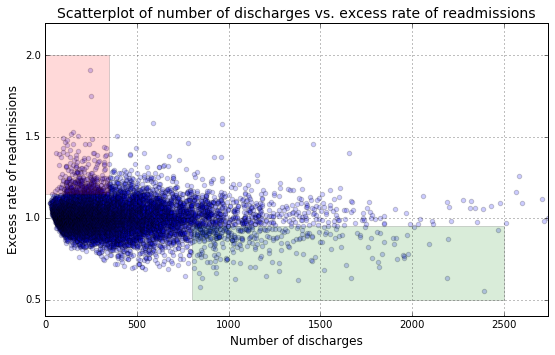

In [72]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)

## plt.fill(x, y, 'r')

fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [12]:
# Your turn

In [113]:
import scipy.stats as stats
import math
def ci(series, interval=0.95):
    return stats.t.interval(alpha = interval,
                            df = series.size - 1,
                            loc = series.mean(),
                            scale = series.std()/math.sqrt(series.size))
    # t = stats.t.ppf(1- ((1-interval)/2), series.size - 1)
    # sd = series.std()/math.sqrt(series.size)
    # mean = series.mean()
    # return (mean - (t * sd), mean + (t * sd))

<b>A. Do you agree with the above analysis and recommendations? Why or why not?</B>

Lets look at each of the observations, statistics and conclusions

In [137]:
low_series = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 350]['Excess Readmission Ratio']

In [138]:
low_series = low_series.dropna()

In [110]:
ci(low_series, 0.99)

(1.0182784927697319, 1.0269582075669692)

In [139]:
high_series = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].between(800, 3500, True)]['Excess Readmission Ratio']

In [140]:
high_series = high_series.dropna()

In [141]:
ci(high_series, 0.99)

(0.97596997064078461, 0.99604247380365984)

If we assume the null hypothesis that there is no significant difference between readmission rate for smaller hospitals (<350 discharges) and larger hospitals (800 to 3500 discharges) then we can determine the p-value using a two sample T-test.

In [142]:
stats.ttest_ind(a= low_series,
                b= high_series,
                equal_var=False)

Ttest_indResult(statistic=6.7937481090778267, pvalue=1.8530094587202481e-11)

Since p is far less than 0.01, our significance level, the null hypothesis is not true and there is indeed a difference in rate of readmission

Hence we can say the following about the initial obervation:

1. <i>"Overall, rate of readmissions is trending down with increasing number of discharges" </i>- That definetely seems to be the case

<i>"2.With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

3.With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)"</i> -

This is true as well HOWEVER if we consider all the hospitals in the US then we can say with 99% condfidence that the difference in the rate of readmission of hospitals with less number of discharges (Red Area) and that with more number of discharges (Green Area) is very small.

We can say with 99% of confidence that the average rate of admission for smaller hospitals (number of discharges < 350) would be between 1.0183 and 1.0270 and that for larger hospitals (number of discharges between 800 and 3500) would be between 0.976 and 0.996.

Hence the maximum difference would be only approx 0.051 (1.0270 -  0.976) and does not support the conclusion that there is a <b>significant</b> correlation between hospital capacity (number of discharges) and readmission rates.

Now lets look at the Statistics that were rerpoted in part B

<i>"In hospitals/facilities with number of discharges &lt; 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1"</i>


In [143]:
low_series = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'].dropna()

In [144]:
low_series.mean()

1.0226183501683506

In [145]:
len(low_series)

1188

In [146]:
len(low_series[low_series > 1])* 100 /float(len(low_series))

63.215488215488215

In [147]:
ci(low_series, 0.99)

(1.0182784927697319, 1.0269582075669692)

In [148]:
high_series = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'].dropna()

In [149]:
high_series.mean()

0.9783354211663071

In [150]:
len(high_series[high_series > 1])* 100 /float(len(high_series))

44.49244060475162

In [151]:
ci(high_series, 0.99)

(0.96390988455153725, 0.99276095778107698)

Again, if we assume the null hypothesis that there is no significant difference between readmission rate for smaller hospitals (&lt;100 discharges) and larger hospitals (>1000 discharges) then we can determine the p-value using a two sample T-test.

In [152]:
stats.ttest_ind(a= low_series,
                b= high_series,
                equal_var=False)

Ttest_indResult(statistic=7.6017424185004856, pvalue=1.2752435451140344e-13)

Since p is far less than 0.01, our significance level, the null hypothesis is not true and there is indeed a difference in rate of readmission

We can conclude that,

1. The statistic reported are accurate.

2. There is a 99% chance that the rate of readmission for smaller hospitals (in this case hospitals with discharges less than 100) is greater than that of larger hospitals (discharges > 1000).

3. Again, however, we can say with with 99% confidence that the difference between rate of admission won't be more that 0.063 (1.027 - 0.964).


<b>Statistical significance versus practical significance:</b>
Although the difference in rate of readmissions for smaller hospitals compared to larger hospitals is proven to be statistically significant the actual difference iteself seem to be farily small. The difference could be accounted by the variation in the two groups.

Practical significance is more subjective and should take into account whether the difference in rate of readmission is good enough to warrant a policy change. In this case it does not seem like it.


<b>Recommendation:</b>

It may not be the case that the size of the hospital measured via the number of discharges affect the rate of readmission. Moreover there may not be any causality between the number of discharges and rate of readmission and we should reject the eariler recommended policy changes.
    

Scatterplot:

The scatter plot has the advantage that it depcits the clustering of the hospitals in terms of rate of readmission w.r.t number of discharges very well.
To some extent it also shows the variation in the rate of readmission.
However, it fails to show the overall trend of rate of readmission.
    

Alternate plots:

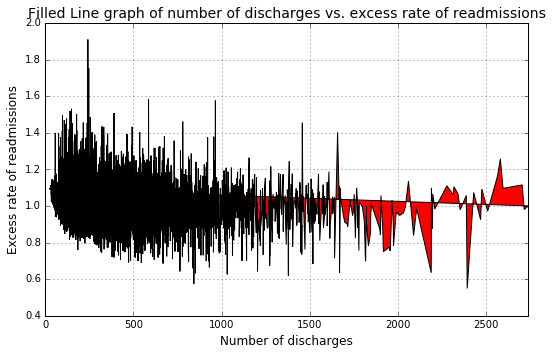

In [167]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Filled Line graph of number of discharges vs. excess rate of readmissions', fontsize=14)
ax.grid(True)
plt.fill(x, y, 'r')
fig.tight_layout()

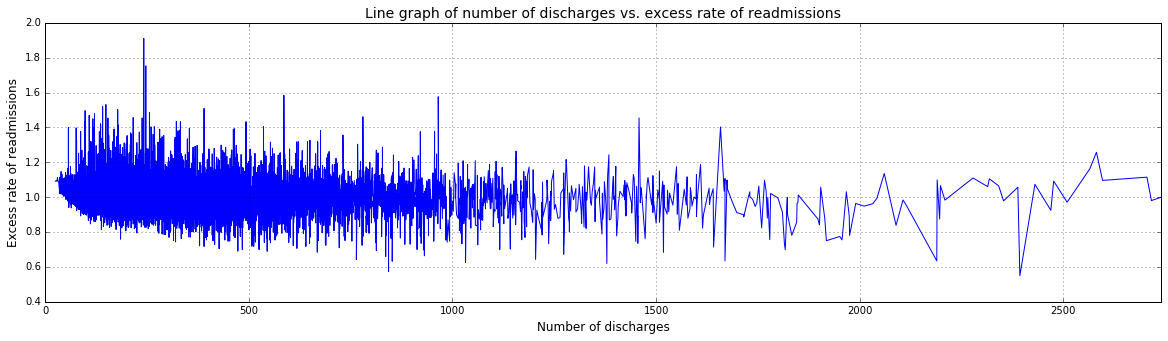

In [169]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Line graph of number of discharges vs. excess rate of readmissions', fontsize=14)
ax.grid(True)
plt.plot(x,y)
plt.show()

References:
http://gradnyc.com/wp-content/uploads/2012/08/GNYC_Academy_Workshop-4_Statistical-vs-Practical-Significance.pdf
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html